In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Data_Hackathon.csv')

In [3]:
df.head(15)

,Unnamed: 0,Upsell,Increasing instalment,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61
0,NaN,Upgrade,Increasing term,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Sales, by month",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Month,1/31/19,2/28/19,3/31/19,4/30/19,5/31/19,6/30/19,7/31/19,8/31/19,...,3/31/23,4/30/23,5/31/23,6/30/23,7/31/23,8/31/23,9/30/23,10/31/23,11/30/23,12/31/23
5,NaN,Volume (units),10000,"10,200","10,404","10,612","10,824","11,041","11,262","11,487",...,"26,916","27,454","28,003","28,563","29,135","29,717","30,312","30,918","31,536","32,167"


In [4]:
df.isnull().sum()

Unnamed: 0               5
Upsell                   3
Increasing instalment    3
Unnamed: 3               4
Unnamed: 4               4
                        ..
Unnamed: 57              4
Unnamed: 58              4
Unnamed: 59              4
Unnamed: 60              4
Unnamed: 61              4
Length: 62, dtype: int64

In [5]:
df.dtypes

Unnamed: 0               object
Upsell                   object
Increasing instalment    object
Unnamed: 3               object
Unnamed: 4               object
                          ...  
Unnamed: 57              object
Unnamed: 58              object
Unnamed: 59              object
Unnamed: 60              object
Unnamed: 61              object
Length: 62, dtype: object

In [6]:
df.describe()

,Unnamed: 0,Upsell,Increasing instalment,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61
count,1,3,3,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
unique,1,3,3,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,"Sales, by month",Upgrade,Increasing term,2/28/19,3/31/19,4/30/19,5/31/19,6/30/19,7/31/19,8/31/19,...,3/31/23,4/30/23,5/31/23,6/30/23,7/31/23,8/31/23,9/30/23,10/31/23,11/30/23,12/31/23
freq,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


DATA PREPROCESSING

In [7]:
data = {
    'Month': ["1/31/19", "2/28/19", "3/31/19", "4/30/19", "5/31/19", "6/30/19", "7/31/19", "8/31/19", "9/30/19", "10/31/19", "11/30/19", "12/31/19", "1/31/20", "2/29/20", "3/31/20", "4/30/20", "5/31/20", "6/30/20", "7/31/20", "8/31/20", "9/30/20", "10/31/20", "11/30/20", "12/31/20", "1/31/21", "2/28/21", "3/31/21", "4/30/21", "5/31/21", "6/30/21", "7/31/21", "8/31/21", "9/30/21", "10/31/21", "11/30/21", "12/31/21", "1/31/22", "2/28/22", "3/31/22", "4/30/22", "5/31/22", "6/30/22", "7/31/22", "8/31/22", "9/30/22", "10/31/22", "11/30/22", "12/31/22", "1/31/23", "2/28/23", "3/31/23", "4/30/23", "5/31/23", "6/30/23", "7/31/23", "8/31/23", "9/30/23", "10/31/23", "11/30/23", "12/31/23"
              ],
    'Volume (units)': [10000, 10200, 10404, 10612, 10824, 11041, 11262, 11487, 11717, 11951, 12190, 12434, 12682, 12936, 13195, 13459, 13728, 14002, 14282, 14568, 14859, 15157, 15460, 15769, 16084, 16406, 16734, 17069, 17410, 17758, 18114, 18476, 18845, 19222, 19607, 19999, 20399, 20807, 21223, 21647, 22080, 22522, 22972, 23432, 23901, 24379, 24866, 25363, 25871, 26388, 26916, 27454, 28003, 28563, 29135, 29717, 30312, 30918, 31536, 32167
                       ]
}

In [8]:
df = pd.DataFrame(data)

In [9]:
df.head(15)

,Month,Volume (units)
0,1/31/19,10000
1,2/28/19,10200
2,3/31/19,10404
3,4/30/19,10612
4,5/31/19,10824
5,6/30/19,11041
6,7/31/19,11262
7,8/31/19,11487
8,9/30/19,11717
9,10/31/19,11951


In [10]:
df.shape

(60, 2)

Monthly Sales

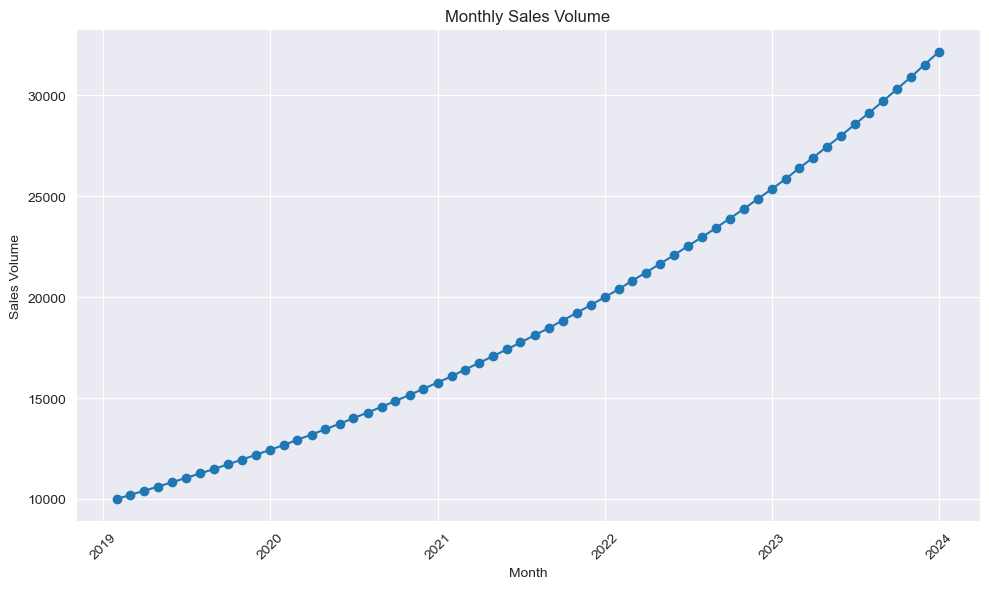

In [11]:
# Convert 'Month' column to datetime format
df['Month'] = pd.to_datetime(df['Month'], format='%m/%d/%y')

# Set 'Month' as the index
df.set_index('Month', inplace=True)

# Resample to monthly frequency and sum the sales volume
monthly_sales = df.resample('M').sum()

# Plot monthly sales volume
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales['Volume (units)'], marker='o', linestyle='-')
plt.title('Monthly Sales Volume')
plt.xlabel('Month')
plt.ylabel('Sales Volume')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Calculate Eligibility

In [18]:
def calculate_eligibility(df):
    # Calculate eligibility for upsells (cash loans)
    df['Upsell_Eligible'] = 0.9 * df['Volume (units)']

    # Calculate eligibility for upgrades (TV upgrades)
    df['Upgrade_Eligible'] = 0
    for i in range(len(df)):
        if i >= 400:
            prev_upsells = df.iloc[i-400:i]['Upsell_Eligible'].sum()
            upsell_count = df.iloc[i-400:i]['Upsell_Eligible'].apply(lambda x: 1 if x > 0 else 0).sum()
            if upsell_count == 0:
                upgrade_eligibility = 0.75 * df.iloc[i]['Volume (units)']
            else:
                upgrade_eligibility = max(0, 0.75 - 0.2 * upsell_count) * df.iloc[i]['Volume (units)']
            df.loc[df.index[i], 'Upgrade_Eligible'] = upgrade_eligibility

    return df

# Apply eligibility calculation function
df = calculate_eligibility(df)
# Check the updated DataFrame
print(df.head())

            Volume (units)  Upsell_Eligible  Upgrade_Eligible  Upsell_Profit  \
Month                                                                          
2019-01-31           10000           9000.0                 0  200187.134907   
2019-02-28           10200           9180.0                 0  202013.346467   
2019-03-31           10404           9363.6                 0  203622.176727   
2019-04-30           10612           9550.8                 0  205320.876683   
2019-05-31           10824           9741.6                 0  206951.459324   

            Upgrade_Profit  
Month                       
2019-01-31             0.0  
2019-02-28             0.0  
2019-03-31             0.0  
2019-04-30             0.0  
2019-05-31             0.0  


Profit Contributions for upsells and upgrades



In [19]:
def calculate_profit_contribution(df):
    # Calculate profit contribution for upsells
    df['Upsell_Profit'] = 25 * df['Upsell_Eligible'] * 0.9 / np.power(1.15, (df.index.dayofyear - 1) / 365)

    # Calculate profit contribution for upgrades
    df['Upgrade_Profit'] = 150 * df['Upgrade_Eligible'] * 0.5 / np.power(1.15, (df.index.dayofyear - 1) / 365)

    return df

# Apply profit contribution calculation function
df = calculate_profit_contribution(df)

# Check the updated DataFrame
print(df.head())

            Volume (units)  Upsell_Eligible  Upgrade_Eligible  Upsell_Profit  \
Month                                                                          
2019-01-31           10000           9000.0                 0  200187.134907   
2019-02-28           10200           9180.0                 0  202013.346467   
2019-03-31           10404           9363.6                 0  203622.176727   
2019-04-30           10612           9550.8                 0  205320.876683   
2019-05-31           10824           9741.6                 0  206951.459324   

            Upgrade_Profit  
Month                       
2019-01-31             0.0  
2019-02-28             0.0  
2019-03-31             0.0  
2019-04-30             0.0  
2019-05-31             0.0  


Optimization Problem:

By adopting to Linear Programming I have formulated an optimization problem to maximize the total profit by finding the optimal mix of upsells and upgrades to sell each month

In [20]:
from scipy.optimize import minimize

def objective_function(x, df):
    upsell_profit = df['Upsell_Profit'].values
    upgrade_profit = df['Upgrade_Profit'].values
    return -np.dot(upsell_profit, x[:len(upsell_profit)]) - np.dot(upgrade_profit, x[len(upsell_profit):])

def upsell_constraint(x, df):
    return x[:len(df)] - df['Upsell_Eligible'].values

def upgrade_constraint(x, df):
    return x[len(df):] - df['Upgrade_Eligible'].values

def optimize_product_mix_scipy(df):
    # Initial guess for the decision variables
    x0 = np.zeros(2 * len(df))

    # Define bounds for the decision variables (non-negative)
    bounds = [(0, None)] * len(x0)

    # Define constraints
    constraints = [
        {'type': 'ineq', 'fun': upsell_constraint, 'args': (df,)},
        {'type': 'ineq', 'fun': upgrade_constraint, 'args': (df,)}
    ]

    # Optimize the objective function subject to constraints
    result = minimize(objective_function, x0, args=(df,), method='SLSQP', bounds=bounds, constraints=constraints)

    # Extract the optimal solution
    upsell_optimal = result.x[:len(df)]
    upgrade_optimal = result.x[len(df):]

    # Update the DataFrame with optimal solution
    df['Upsell'] = upsell_optimal
    df['Upgrade'] = upgrade_optimal

    return df

# Optimize the product mix using SciPy
df_optimized = optimize_product_mix_scipy(df.copy())

print(df_optimized.head())

            Volume (units)  Upsell_Eligible  Upgrade_Eligible  Upsell_Profit  \
Month                                                                          
2019-01-31           10000           9000.0                 0  200187.134907   
2019-02-28           10200           9180.0                 0  202013.346467   
2019-03-31           10404           9363.6                 0  203622.176727   
2019-04-30           10612           9550.8                 0  205320.876683   
2019-05-31           10824           9741.6                 0  206951.459324   

            Upgrade_Profit         Upsell  Upgrade  
Month                                               
2019-01-31             0.0  892861.884634      0.0  
2019-02-28             0.0  895028.500822      0.0  
2019-03-31             0.0  896937.215980      0.0  
2019-04-30             0.0  898952.552486      0.0  
2019-05-31             0.0  900887.074654      0.0  


Forecast the sales

In [22]:
def forecast_sales(df):
    # Shift the Upsell and Upgrade columns by one period to get the forecasted values
    df['Upsell_Forecast'] = df['Upsell'].shift(-1) * 0.9
    df['Upgrade_Forecast'] = df['Upgrade'].shift(-1) * 0.5

    # Fill NaN values with 0
    df.fillna(0, inplace=True)

    return df

# Forecast sales based on the current data
df_forecasted = forecast_sales(df_optimized.copy())

print(df_forecasted.head())  # Display the DataFrame with forecasts

            Volume (units)  Upsell_Eligible  Upgrade_Eligible  Upsell_Profit  \
Month                                                                          
2019-01-31           10000           9000.0                 0  200187.134907   
2019-02-28           10200           9180.0                 0  202013.346467   
2019-03-31           10404           9363.6                 0  203622.176727   
2019-04-30           10612           9550.8                 0  205320.876683   
2019-05-31           10824           9741.6                 0  206951.459324   

            Upgrade_Profit         Upsell  Upgrade  Upsell_Forecast  \
Month                                                                 
2019-01-31             0.0  892861.884634      0.0    805525.650740   
2019-02-28             0.0  895028.500822      0.0    807243.494382   
2019-03-31             0.0  896937.215980      0.0    809057.297237   
2019-04-30             0.0  898952.552486      0.0    810798.367189   
2019-05-31   

Results and recommendations

In [25]:
# 1) Forecast sales of cash loans and TV upgrades for each month in 2023
print("1) Sales Forecast for 2023:")
print("   Forecasted sales of cash loans and TV upgrades for each month in 2023:")
print(df_forecasted.loc['2023-01-31':'2023-12-31', ['Upsell_Forecast', 'Upgrade_Forecast']])

# 2) Total profit under the optimal product mix
print("\n2) Profit Calculation:")
print(f"   Total profit under the optimal product mix: ${total_profit:.2f}")

1) Sales Forecast for 2023:
   Forecasted sales of cash loans and TV upgrades for each month in 2023:
            Upsell_Forecast  Upgrade_Forecast
Month                                        
2023-01-31     2.917329e+06               0.0
2023-02-28     2.921778e+06               0.0
2023-03-31     2.926468e+06               0.0
2023-04-30     2.930983e+06               0.0
2023-05-31     2.935756e+06               0.0
2023-06-30     2.940362e+06               0.0
2023-07-31     2.944975e+06               0.0
2023-08-31     2.949879e+06               0.0
2023-09-30     2.954577e+06               0.0
2023-10-31     2.959541e+06               0.0
2023-11-30     2.964327e+06               0.0
2023-12-31     0.000000e+00               0.0

2) Profit Calculation:
   Total profit under the optimal product mix: $21383532.94


2. **Potential Adjustments to Business Rules**: To improve profitability, we can consider the following adjustments to business rules:
    
    - Offer special promotions or discounts to incentivize TV upgrades, potentially increasing the conversion rate.
    - Explore new upsell opportunities or product bundles to enhance the attractiveness of cash loans.

3. **Operational Improvements to Investigate**: To improve profitability, we should focus on operational improvements such as:
    
    - Analyzing customer feedback and preferences to tailor product offerings.
    - Optimizing the sales process by streamlining procedures and reducing friction points.
    - Enhancing customer service and support to ensure a positive experience throughout the purchasing journey.
    
4. **Operational Improvements to Investigate**: To improve profitability, we should focus on operational improvements such as:

- Analyzing customer feedback and preferences to tailor product offerings and marketing strategies.
- Optimizing the sales process by streamlining procedures and reducing friction points.
- Enhancing customer service and support to ensure a positive experience throughout the purchasing journey.
- Investing in technology and analytics to gain insights into customer behavior and market trends, enabling data-driven decision-making.
- Expanding the distribution channels to reach a wider audience and increase sales opportunities.


Example: Based on the analysis, we can see that while cash loans (upsells) are performing well, there is untapped potential in TV upgrades (upgrades). By adjusting our business rules to incentivize upgrades and implementing operational improvements to enhance customer engagement, we can maximize profitability and drive sustainable growth in the long run.
